# K-Means

### Read data from ‘Personal cost medical.csv’

In [94]:
#import library that need to use 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('insurance.csv')

### Basic Exploration & Data Cleaning & Feature Engineering (if any):

In [96]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
#use for identification data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [98]:
#Finding missing values for each feature
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [99]:
num_data = df.select_dtypes(include='number')
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


#### Exploratory Data Analysis

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

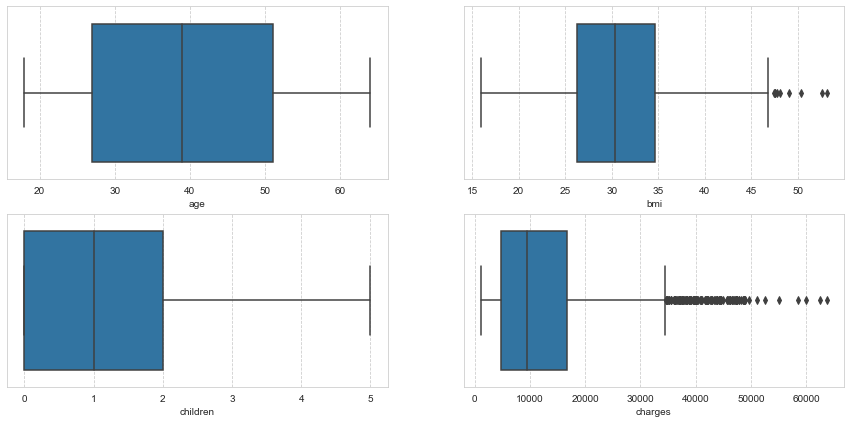

In [100]:
# Create count plots for all nominal features
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(num_data[i], ax=subplot)

Text(0.5, 1.0, 'Distribution of charges by age')

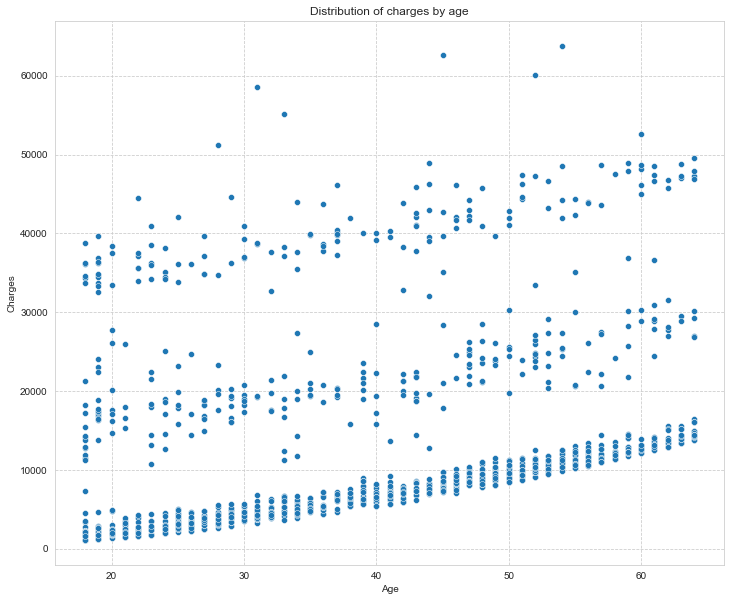

In [101]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "age", y = "charges", data = df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age")

Text(0.5, 1.0, 'Distribution of charges by bmi')

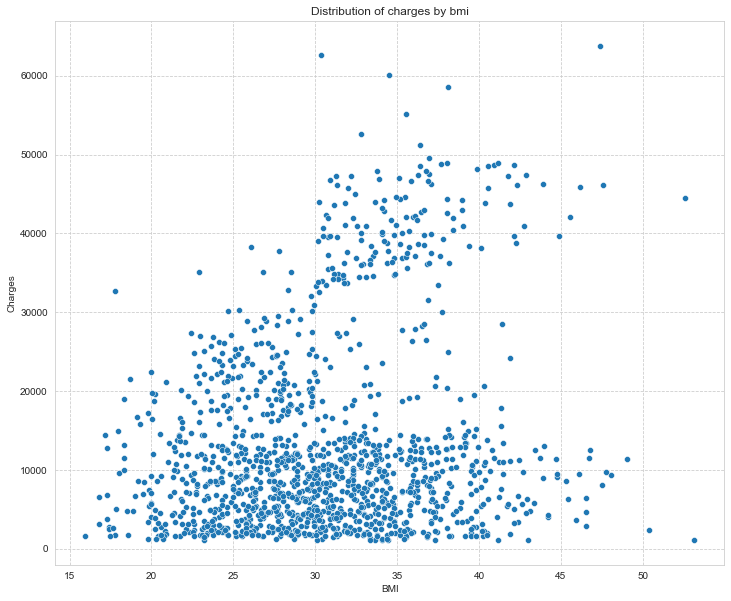

In [102]:
#The relationship between BMI and insurance claims.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "bmi", y = "charges", data = df)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of charges by bmi")

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

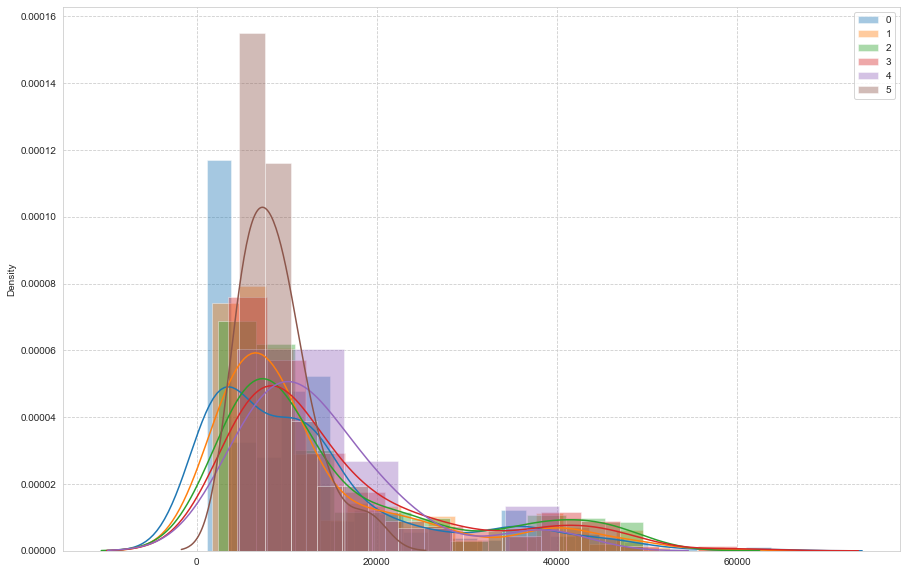

In [103]:
#Charges by smoker and number of children
fig, ax = plt.subplots(figsize = (15, 10))
sns.distplot(x=df.loc[df['children']==0, 'charges'], label='0', ax=ax)
sns.distplot(x=df.loc[df['children']==1, 'charges'], label='1', ax=ax)
sns.distplot(x=df.loc[df['children']==2, 'charges'], label='2', ax=ax)
sns.distplot(x=df.loc[df['children']==3, 'charges'], label='3', ax=ax)
sns.distplot(x=df.loc[df['children']==4, 'charges'], label='4', ax=ax)
sns.distplot(x=df.loc[df['children']==5, 'charges'], label='5', ax=ax)
plt.legend()
plt.show()

In [106]:
# fill outlier numeric in bmi feature with mean
num_data[['bmi']] = num_data.bmi.fillna(num_data.mean()) 

#fill outlier numeric in charges feature with median
num_data[['charges']] = num_data.charges.fillna(num_data.median())
num_data

C:\Users\ASUS\AppData\Local\Temp/ipykernel_17232/3074692731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[['bmi']] = num_data.bmi.fillna(num_data.mean())
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_17232/3074692731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [107]:
#get class data
cat_data = df.select_dtypes(include='object')
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [108]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [109]:
# Combine nominal and numeric features
df = pd.concat([num_data, cat_data], axis=1, sort=False)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Normalization

In [110]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns) 
X.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


##### Cluster data using K-means with k=10 and then report the accuracies (SSE and Silhouette Coefficient).

In [111]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
cluster_labels = kmeans.fit_predict(X)

In [112]:
cluster_labels

array([9, 6, 6, ..., 5, 2, 9])

### 4.	What is the optimum (best) k value for the K-means model of this dataset? 

###### K-means Algorithm

In [113]:
# Measure the quality of clusterings with different numbers of clusters using the inertia. 
# For each of the given values of k, perform the following steps:
#     Create a KMeans instance called model with k clusters.
#     Fit the model to the data.
#     Append the value of the inertia_ attribute of model to the list inertias.

from sklearn.cluster import KMeans

ks = range(1, 21) # for 1 to 25 clusters
sse = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    #kmeans = KMeans(n_clusters=k)
    kmeans = KMeans(n_clusters = k)

    # Fit model to samples
    kmeans.fit(X)

    # Append the inertia to the list of inertias
    sse.append(kmeans.inertia_)

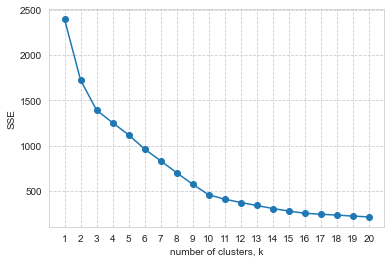

In [114]:
# Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!
import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(ks, sse, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

###### From the graph that k=15 is a good number of clusters, since it is a point where the SSE begins to decrease more slowly.

In [115]:
#Applying kmeans to the dataset with the optimal k value
k = 15
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
col_names = list(df.columns.values)

# append cluster labels to the last column of the dataset
result = pd.concat([pd.DataFrame(df,columns=col_names), pd.DataFrame(y_kmeans,columns=['ClusterLabels']) ], axis=1)

#cluster label starts from 0
result.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,ClusterLabels
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,12
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,7
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,7


### 5.	Create an optimum K-means model with the optimal k value.

Use the optimal k value from the previos section to create a model and assign cluster label for each data sample (use .fit_predict)

In [116]:
#Applying kmeans to the dataset with the optimal k value
k = 15
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
col_names = list(df.columns.values)

# append cluster labels to the last column of the dataset
result = pd.concat([pd.DataFrame(df,columns=col_names), pd.DataFrame(y_kmeans,columns=['ClusterLabels']) ], axis=1)

#cluster label starts from 0
result.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,ClusterLabels
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,14
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,2
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,2


#### Returns the array of cluster labels each data point belongs to

In [117]:
print(y_kmeans)

[14  1  1 ...  6  5  9]


#### 5.1 What is SSE of the optimal model?

In [118]:
# Sum of Squared Error of the oprimum model
sse = kmeans.inertia_
print("Sum of Squared Error (SSE): ", sse)

Sum of Squared Error (SSE):  276.6176461892427


#### 5.2 What is Silhouette Coefficient of the optimal model?

In [119]:
#  A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, cluster_labels)
silhouette

0.5410825582611969

In [120]:
# Number of members in each cluster
result.ClusterLabels.value_counts()

5     141
6     139
4     135
1     134
0     132
2     132
7     126
8     125
3      55
14     50
11     38
10     37
12     36
9      29
13     29
Name: ClusterLabels, dtype: int64

In [121]:
# Transform centroid data back to the original scale.
print("Centroid data:")
centriods_data = mms.inverse_transform(kmeans.cluster_centers_)
centriods_data = pd.DataFrame(centriods_data,columns=col_names)
centriods_data

Centroid data:


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.840909,29.777462,0.954545,9640.426984,1.000000e+00,1.110223e-16,1.000000e+00,-2.775558e-17,1.000000e+00,5.551115e-17,0.000000e+00,5.551115e-17
1,38.261194,34.129552,1.052239,7609.003587,-5.551115e-17,1.000000e+00,1.000000e+00,-5.551115e-17,-2.775558e-17,1.110223e-16,1.000000e+00,1.110223e-16
2,38.568182,28.930379,1.060606,8320.689321,-5.551115e-17,1.000000e+00,1.000000e+00,-2.775558e-17,-2.775558e-17,1.000000e+00,0.000000e+00,5.551115e-17
3,40.054545,33.650000,1.036364,36029.839367,-5.551115e-17,1.000000e+00,-1.110223e-16,1.000000e+00,5.551115e-17,0.000000e+00,1.000000e+00,0.000000e+00
4,39.755556,29.488704,1.177778,8786.998679,1.000000e+00,1.110223e-16,1.000000e+00,-5.551115e-17,-5.551115e-17,1.000000e+00,0.000000e+00,5.551115e-17
5,40.099291,30.050355,1.134752,8234.091260,1.000000e+00,1.110223e-16,1.000000e+00,-2.775558e-17,-5.551115e-17,8.326673e-17,0.000000e+00,1.000000e+00
6,39.071942,32.780000,1.079137,8440.205552,1.000000e+00,1.110223e-16,1.000000e+00,-8.326673e-17,-5.551115e-17,2.775558e-17,1.000000e+00,2.775558e-17
7,40.277778,31.019841,1.119048,7778.905534,-5.551115e-17,1.000000e+00,1.000000e+00,-5.551115e-17,0.000000e+00,8.326673e-17,0.000000e+00,1.000000e+00
8,39.216000,28.861760,1.144000,8664.042222,-1.110223e-16,1.000000e+00,1.000000e+00,-8.326673e-17,1.000000e+00,2.775558e-17,-5.551115e-17,2.775558e-17
9,38.827586,28.296897,0.827586,29670.824946,1.000000e+00,1.110223e-16,0.000000e+00,1.000000e+00,2.775558e-17,1.000000e+00,0.000000e+00,0.000000e+00


# Hierarchical Clustering

#### Create Dendrogram

##### For Single-Linkage

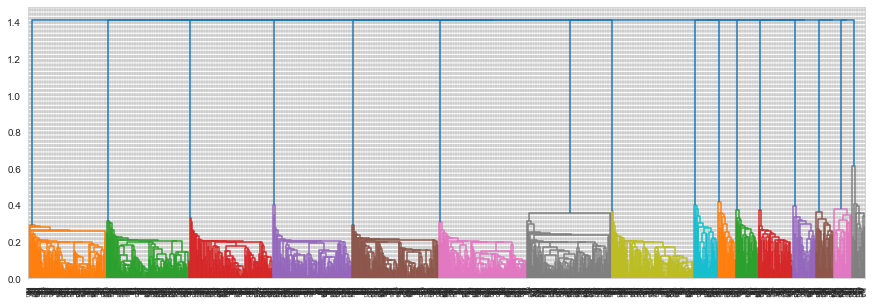

In [122]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
dn = hierarchy.dendrogram(hierarchy.linkage(X, 'single'))
plt.show()

##### For Average-Linkage

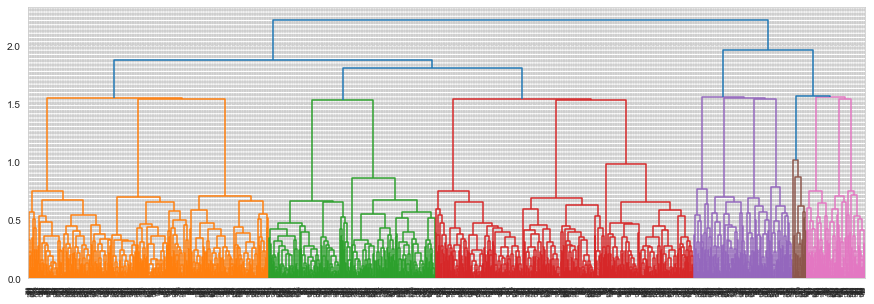

In [123]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
dn = hierarchy.dendrogram(hierarchy.linkage(X, 'average'))
plt.show()

##### For Complete-Linkage

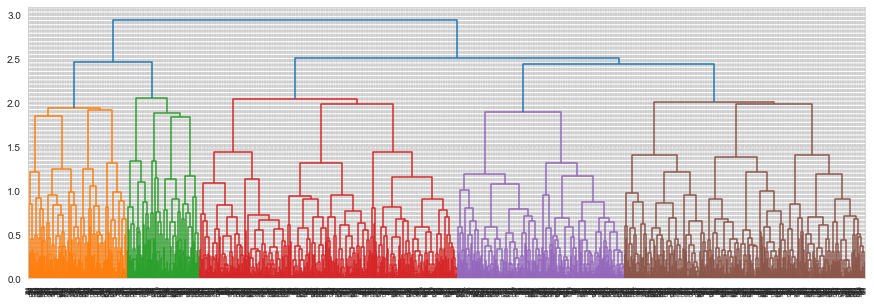

In [124]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
dn = hierarchy.dendrogram(hierarchy.linkage(X, 'complete'))
plt.show()

##### Data Clustering using Agglomerative Algorithm

###### Single-Linkage

In [125]:
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
y_ac_s

array([ 2,  7,  7, ...,  0,  0, 11], dtype=int64)

###### Average-Linkage

In [126]:
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
y_ac_a

array([ 2,  3,  3, ..., 13,  1, 11], dtype=int64)

###### Complete Linkage

In [127]:
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
y_ac_c

array([6, 7, 7, ..., 1, 2, 0], dtype=int64)

#### Silhouette coefficients (prefers high value)

In [128]:
#  A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score
sil_s = silhouette_score(X, y_ac_s)
sil_a = silhouette_score(X, y_ac_a)
sil_c = silhouette_score(X, y_ac_c)
print('Silhouette coefficients for Single Linkage : '+ str(sil_s))
print('Silhouette coefficients for Average Linkage : '+ str(sil_a))
print('Silhouette coefficients for Complete Linkage : '+ str(sil_c))

Silhouette coefficients for Single Linkage : 0.5629288211887216
Silhouette coefficients for Average Linkage : 0.5659915916329897
Silhouette coefficients for Complete Linkage : 0.6164426812302934


#### Choosing an optimal number of cluster (k)

In [129]:
# Measure the quality of clusterings with different numbers of clusters using the inertia. 
# For each of the given values of k, perform the following steps:
#     Create a KMeans instance called model with k clusters.
#     Fit the model to the data.
#     Append the value of the inertia_ attribute of model to the list inertias.

from sklearn.cluster import KMeans

ks = range(1, 21) # for 1 to 20 clusters
sse = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    km = KMeans(n_clusters = k, random_state = 0)

    # Fit model to samples
    km.fit(X)

    # Append the inertia to the list of inertias
    sse.append(km.inertia_)

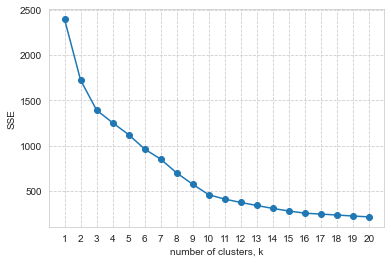

In [130]:
# Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!
import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(ks, sse, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

#### Choosing best model
Use Silhouette to compare several clustering model and then choose the best one to deploy.

In [131]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 15

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

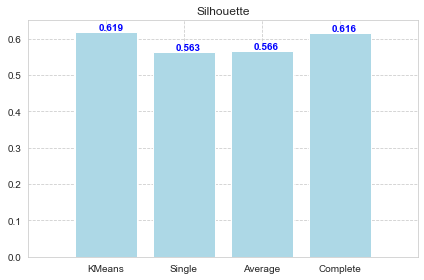

In [132]:
# created a plot that ranks the different features in the dataset by their relative importance; note that the feature importances are normalized so that they sum up to 1.0. 
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [133]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

KMeans(n_clusters=15)
